<h4>farmers dataset</h4>

In [113]:
# an algo which recommend the crops which are suitable to be grown according the given condtitions.

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
print("libraries import")


libraries import


In [115]:
df = pd.read_csv("https://raw.githubusercontent.com/upflairs-pvt-ltd/3rd_july_datascience/refs/heads/master/farmer_guider/farmer.csv")

In [116]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [117]:
df['label'].value_counts()

label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute           100
coffee         100
Name: count, dtype: int64

In [118]:
df.info()    # 2200 records

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [119]:
df.dtypes  # only label column is a categorical value

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [120]:
# only x is here not yy

In [121]:
group = df.groupby('label')

In [122]:
minimum = group[['temperature']].min()
minimum

,temperature
label,
apple,21.036527
banana,25.010185
blackgram,25.097374
chickpea,17.024985
coconut,25.008724
coffee,23.059519
cotton,22.000851
grapes,8.825675
jute,23.094338


In [123]:
maximum = group[['temperature']].max()
maximum

,temperature
label,
apple,23.996862
banana,29.908885
blackgram,34.946616
chickpea,20.995022
coconut,29.869083
coffee,27.923744
cotton,25.992374
grapes,41.948657
jute,26.985822


In [124]:
average = group[['temperature']].mean()
average

,temperature
label,
apple,22.630942
banana,27.376798
blackgram,29.973340
chickpea,18.872847
coconut,27.409892
coffee,25.540477
cotton,23.988958
grapes,23.849575
jute,24.958376


In [125]:
temp = group[['temperature']]
temp

In [126]:
# temp['min'] = minimum
# temp['average'] = average
# temp['max'] = maximum

In [127]:
temp

In [128]:
tmp_sampleanalysis = group['temperature'].agg(['mean','max','min'])

In [129]:
tmp_sampleanalysis.reset_index(inplace = True)
tmp_sampleanalysis.head()

,label,mean,max,min
0,apple,22.630942,23.996862,21.036527
1,banana,27.376798,29.908885,25.010185
2,blackgram,29.973340,34.946616,25.097374
3,chickpea,18.872847,20.995022,17.024985
4,coconut,27.409892,29.869083,25.008724


In [130]:
x = list(tmp_sampleanalysis['label'])
x

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [131]:
y = list(tmp_sampleanalysis['min'])
y

[21.0365275,
 25.01018457,
 25.09737391,
 17.02498456,
 25.00872392,
 23.05951896,
 22.00085141,
 8.825674745,
 23.09433785,
 15.33042636,
 18.06486101,
 18.04185513,
 27.00315545,
 24.01825377,
 27.01470397,
 27.02415146,
 10.01081312,
 23.012401800000006,
 18.31910448,
 18.07132963,
 20.0454142,
 24.04355803]

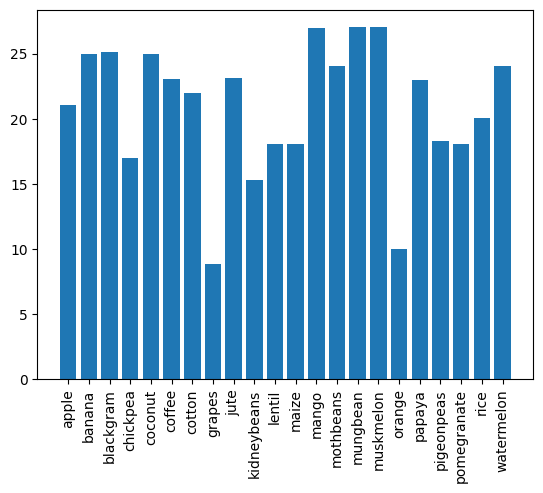

In [132]:
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

In [133]:
humidity_sampleanalysis = group['humidity'].agg(['mean','max','min'])

In [134]:
humidity_sampleanalysis.reset_index(inplace = True)
humidity_sampleanalysis.head()

,label,mean,max,min
0,apple,92.333383,94.920481,90.025751
1,banana,80.358123,84.978492,75.031933
2,blackgram,65.118426,69.961000,60.065349
3,chickpea,16.860439,19.969789,14.258040
4,coconut,94.844272,99.981876,90.017345


In [135]:
x = humidity_sampleanalysis['label']

In [136]:
y = humidity_sampleanalysis['min']

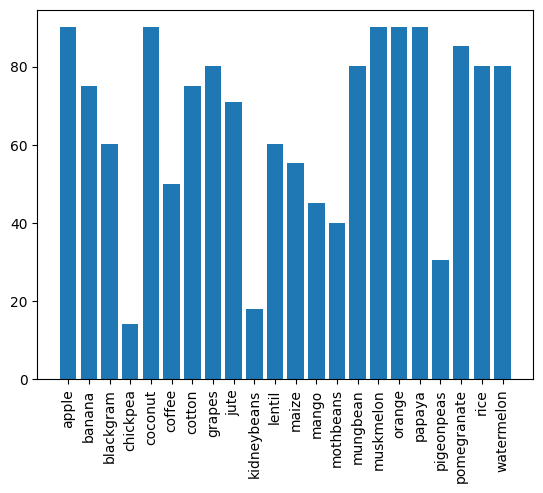

In [137]:
plt.bar(x,y)
plt.xticks(rotation = 90)
plt.show()

In [138]:
# sns.barplot(x = humidity_sampleanalysis['label'],y = humidity_sampleanalysis['min'])
# plt.xticks(rotation = 90)
# plt.show()

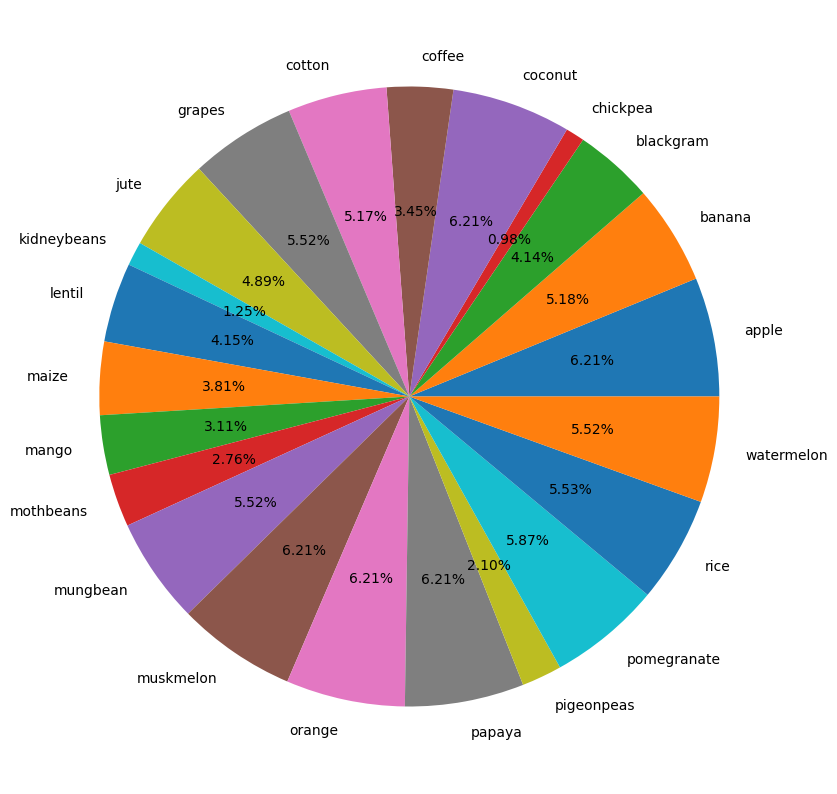

In [139]:
plt.figure(figsize=(10,20))
plt.pie(y, labels = x, autopct = "%2.2f%%")        # ec directly cant work here so we use wedgeprops={'':''}
plt.show()

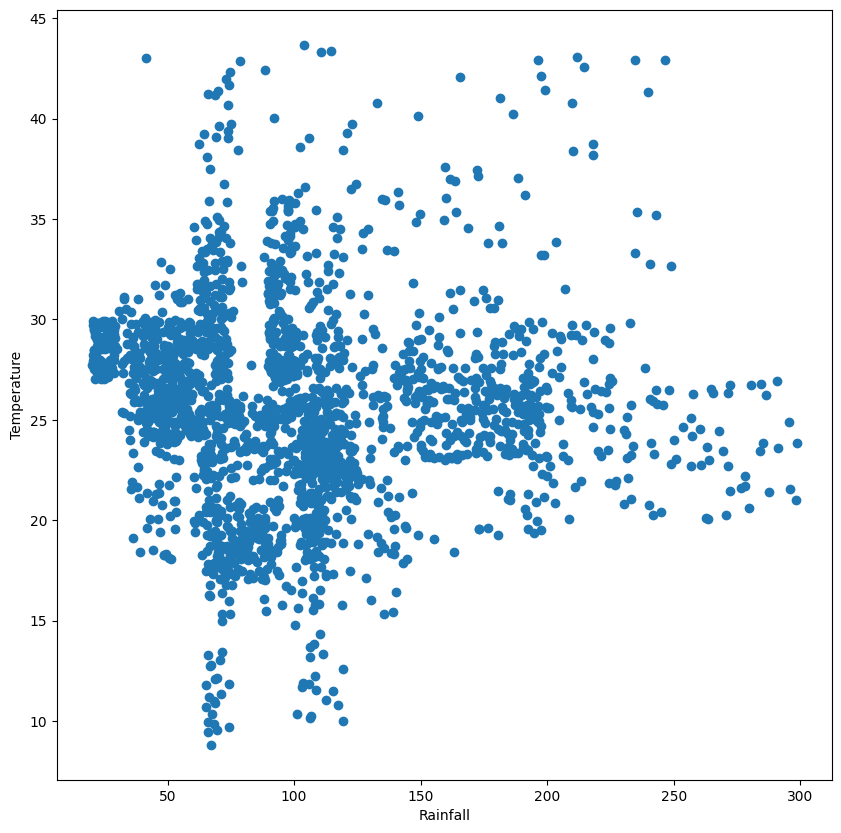

In [140]:
plt.figure(figsize=(10,10))
plt.scatter(x=df['rainfall'],y=df['temperature'])
plt.ylabel('Temperature')
plt.xlabel('Rainfall')
plt.show()

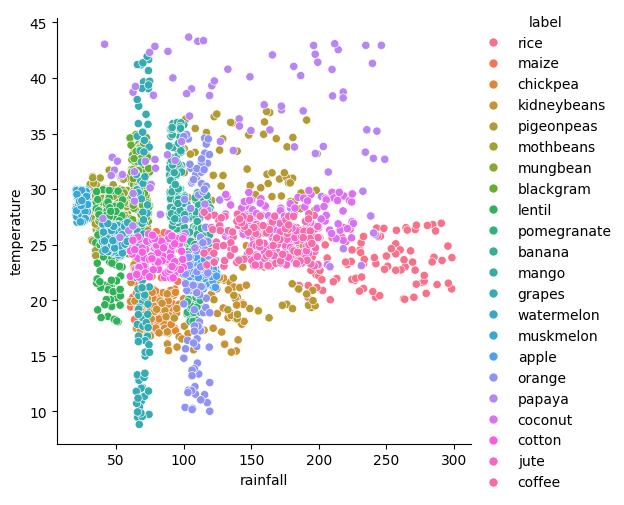

In [141]:
sns.relplot(x='rainfall',y='temperature',data=df,hue='label')

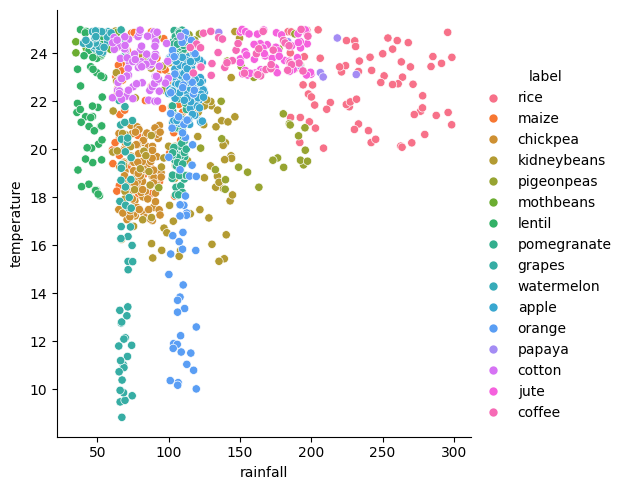

In [142]:
sns.relplot(x='rainfall',y='temperature',data=df[df['temperature'] <= 25],hue='label',)

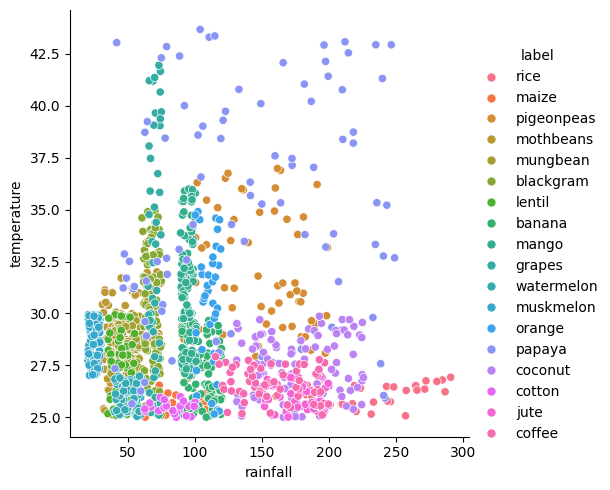

In [143]:
sns.relplot(x='rainfall',y='temperature',data=df[df['temperature'] > 25],hue='label',)

<h1>28 sept</h1>

In [144]:
df2 = df.drop(['label'],axis=1)

In [145]:
df2.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
std_scalar = StandardScaler()

In [148]:
std_scalar.fit(df2)

StandardScaler()

In [149]:
x = std_scalar.transform(df2)

In [150]:
x

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [151]:
x.shape

(2200, 7)

In [152]:
from sklearn.cluster import KMeans

In [153]:
kmeans = KMeans()

In [154]:
kmeans.fit(x)

KMeans()

In [155]:
cluster_no = kmeans.labels_
cluster_no

array([5, 5, 5, ..., 5, 3, 5], dtype=int32)

In [156]:
cluster_no.shape

(2200,)

In [157]:
x.shape

(2200, 7)

In [158]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


<h2>for app.py</h2>

<h2>---------------------------------------------------------------</h2>

<h2>---------------------------------------------------------------</h2>

In [159]:
df['cluster_no'] = cluster_no

In [160]:
df.to_csv('models/label_data.csv',index=False)


In [161]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,5
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,5
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,5
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,5
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,5


In [162]:
df['cluster_no'].unique()

array([5, 3, 0, 4, 6, 7, 1, 2], dtype=int32)

In [163]:
cluster_4 = df[df['cluster_no'] == 4]

In [164]:
cluster_4

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_no
115,63,58,22,18.254054,55.282204,6.204748,63.723582,maize,4
177,81,49,20,18.041855,60.614943,5.513698,104.232162,maize,4
182,60,57,24,18.661162,61.553272,6.121294,75.032477,maize,4
205,32,73,81,20.450786,15.403121,5.988993,92.683737,chickpea,4
226,36,65,80,18.287201,16.679216,6.051091,74.874456,chickpea,4
...,...,...,...,...,...,...,...,...,...
830,30,79,22,18.287661,69.485151,6.254217,48.604494,lentil,4
833,10,78,18,18.541418,62.706376,6.296977,44.078197,lentil,4
870,26,66,22,18.064861,65.103435,6.300479,51.549228,lentil,4
871,16,65,16,18.130278,62.458516,6.078724,50.612852,lentil,4


In [165]:
cluster_4['label'].value_counts()

label
kidneybeans    100
pigeonpeas      35
lentil           6
maize            3
chickpea         2
Name: count, dtype: int64

In [166]:
list(cluster_4['label'].unique())

['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'lentil']

In [167]:
import os, joblib

In [168]:
os.makedirs('models',exist_ok=True)
joblib.dump(std_scalar,'models/std_scalar.lb')
joblib.dump(kmeans,'models/kmeans.lb')

['models/kmeans.lb']